# Siggi Example

### Import necessary code from repo

In [1]:
import sys
sys.path.append('..')

In [2]:
from siggi import siggi, filters, spectra, calcIG, plotting
from siggi import Sed
from siggi.lsst_utils import BandpassDict
import matplotlib.pyplot as plt
import numpy as np
%load_ext autoreload
%autoreload 2
%matplotlib inline

### Set up filter object and get example spectra

In [3]:
f = filters()
s = spectra()
red_spec = s.get_red_spectrum()
blue_spec = s.get_blue_spectrum()

### Define redshift prior

In [4]:
def prior_z(z, z0=0.5):
    return (z**2.)*np.exp(-(z/z0)**1.5)/(np.sum((np.arange(0, 2.51, .05)**2.)*np.exp(-(np.arange(0, 2.51, .05)/z0)**1.5)))

In [5]:
# Shows the total entropy for 2 SEDs with equal weighting
entropy = -1. * .5 * np.sum(prior_z(np.arange(0.05, 2.51, .05)) * np.log2(.5 * prior_z(np.arange(0.05, 2.51, .05))))
print(entropy*2.)

5.807147751224095


### Set up a siggi object with the SEDs, the SED weights, the prior, and the redshift binning defined.

In [6]:
sig_example = siggi([red_spec, blue_spec], [0.5, 0.5], prior_z,
                    z_min=0.05, z_max=2.5, z_steps=50)

### Can also include a set of filters that are static and not moved in the optimization

Here we use the LSST *ugrizy* filters

In [7]:
frozen_dict = BandpassDict.loadTotalBandpassesFromFiles(bandpassDir='../data/lsst_baseline_throughputs/')

### Run optimization

In [8]:
%%time
num_filters = 2
res = sig_example.optimize_filters(num_filters=num_filters,
                                   filt_min=300., filt_max=1100., default_width=45., default_ratio=1.0, 
                                   sed_mags=22.0,
                                   adjust_widths=True, width_min=15., width_max=150.,
                                   adjust_width_ratio=False, ratio_min=0.25, ratio_max=0.75,
                                   system_wavelen_max=1200.,
                                   n_opt_points=10, adjust_independently=True,
                                   optimizer_verbosity=5,
                                   procs=2, acq_func_kwargs_dict={'kappa':3},
                                   frozen_filt_dict=frozen_dict, frozen_filt_eff_wavelen=[365, 477, 622, 765, 870, 1015],
                                   starting_points = [[150.0, 150.0, 375.0, 700.0],
                                                      [75.0, 75.0, 375.0, 1025.0],
                                                      [150.0, 150.0, 375.0, 1025.0],
                                                      [75.0, 75.0, 375.0, 700.0]])

[(15.0, 150.0), (15.0, 150.0), (300.0, 1100.0), (300.0, 1100.0)]
[150.0, 150.0, 375.0, 700.0] 5.611023866322985
[75.0, 75.0, 375.0, 1025.0] 5.605088507041434


[Parallel(n_jobs=2)]: Done   2 out of   4 | elapsed:   23.0s remaining:   23.0s


[150.0, 150.0, 375.0, 1025.0] 5.599192760122342
[75.0, 75.0, 375.0, 700.0] 5.620284944801765


[Parallel(n_jobs=2)]: Done   4 out of   4 | elapsed:   47.5s remaining:    0.0s
[Parallel(n_jobs=2)]: Done   4 out of   4 | elapsed:   47.5s finished


-5.620284944801765 4
[63.62082180207627, 115.92337514547758, 568.6561282538328, 691.326032040173] 5.61528059066318


[Parallel(n_jobs=2)]: Done   2 out of   4 | elapsed:   22.7s remaining:   22.7s


[138.93765694602246, 108.07749440412712, 664.0330191099531, 879.5186020248698] 5.591650627463413
[129.6770246950874, 63.32925361983649, 463.51624385663564, 777.2258410928849] 5.5922856788209305


[Parallel(n_jobs=2)]: Done   4 out of   4 | elapsed:   41.0s remaining:    0.0s
[Parallel(n_jobs=2)]: Done   4 out of   4 | elapsed:   41.0s finished


-5.620284944801765 7


[Parallel(n_jobs=2)]: Done   2 out of   4 | elapsed:    0.2s remaining:    0.2s
[Parallel(n_jobs=2)]: Done   4 out of   4 | elapsed:    0.4s remaining:    0.0s
[Parallel(n_jobs=2)]: Done   4 out of   4 | elapsed:    0.4s finished


-5.620284944801765 7


[Parallel(n_jobs=2)]: Done   2 out of   4 | elapsed:    0.2s remaining:    0.2s


[67.36898354992017, 98.20363456812389, 570.9658702039137, 1026.7598690414789] 5.6031923503288095


[Parallel(n_jobs=2)]: Done   4 out of   4 | elapsed:   19.2s remaining:    0.0s
[Parallel(n_jobs=2)]: Done   4 out of   4 | elapsed:   19.2s finished


-5.620284944801765 8
[76.73002010240928, 55.70918265570139, 707.85442538631, 886.6870530207233] 5.600471143558686
[123.51024493157605, 94.85788993286286, 662.2254911077066, 881.8693618394427] 5.5903369303074655


[Parallel(n_jobs=2)]: Done   2 out of   4 | elapsed:   23.5s remaining:   23.5s


[15.0, 15.0, 545.3681647202967, 692.6766277808165] 5.569168502151969


[Parallel(n_jobs=2)]: Done   4 out of   4 | elapsed:   41.4s remaining:    0.0s
[Parallel(n_jobs=2)]: Done   4 out of   4 | elapsed:   41.4s finished


-5.620284944801765 11
CPU times: user 9.9 s, sys: 589 ms, total: 10.5 s
Wall time: 2min 39s


### Find the best results

In [9]:
min_idx = np.argmin(res.yi)

In [10]:
best_pt = res.Xi[min_idx]

In [11]:
best_val = np.min(res.yi)

In [12]:
print(best_pt, best_val)

[75.0, 75.0, 375.0, 700.0] -5.620284944801765


### Plot with Siggi's plotting code

In [13]:
red_spec.redshiftSED(0.5)
blue_spec.redshiftSED(0.5)
sig_plot = plotting([red_spec, blue_spec], best_pt[2:], best_pt[:2], 1.0,
                    frozen_filt_dict=frozen_dict, frozen_filt_eff_wavelen=[365, 477, 622, 765, 870, 1015])

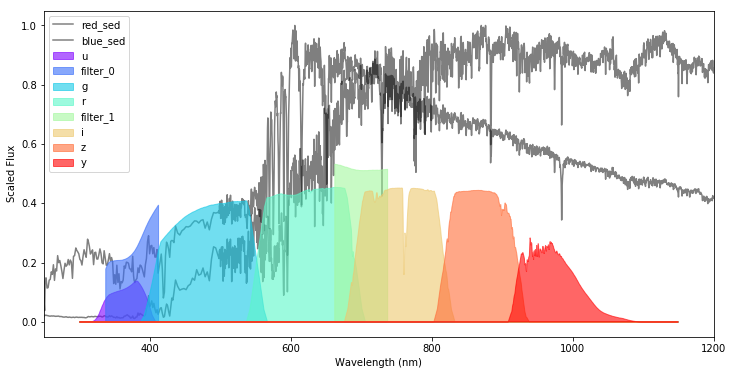

In [14]:
fig = sig_plot.plot_filters()
plt.legend(['red_sed', 'blue_sed'] + sig_plot.filter_dict.keys())